### Precision, Recall and F1 Score

<div style="font-size:20px">
<b>Precision</b> measures how many of the predicted positives are actually correct.  
<b>Recall</b> (also called sensitivity) measures how many of the actual positives were correctly predicted.  
<b>F1 Score</b> is the harmonic mean of Precision and Recall, balancing both metrics.
</div>

<div style="font-size:22px; margin-top:15px">
$Precision = \frac{TP}{TP + FP}$

$Recall = \frac{TP}{TP + FN}$

$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$
</div>

### Interpretation

<div style="font-size:20px">
    
- <b>High Precision</b> → few <i>false alarms</i> (<b>False Positives</b>).  
  When the model predicts a positive case, it is usually correct.  

- <b>High Recall</b> → few <i>misses</i> (<b>False Negatives</b>).  
  The model is able to detect most of the actual positive cases.  

- <b>F1 Score</b> → balance between avoiding <i>false alarms</i> (FP) and avoiding <i>misses</i> (FN).
</div>



Precision: 1.00
Recall: 0.80
F1 Score: 0.89


,Predicted 0,Predicted 1
Actual 0,5,0
Actual 1,1,4


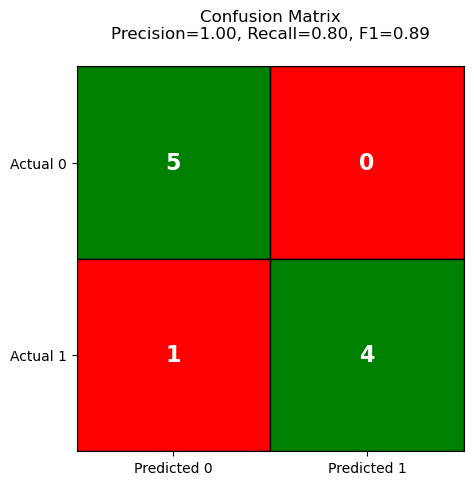

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


y_true = [1, 0, 1, 1, 0, 0, 1, 0, 0, 1]
y_pred = [1, 0, 1, 0, 0, 0, 1, 0, 0, 1]


precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


cm = confusion_matrix(y_true, y_pred)


df_cm = pd.DataFrame(cm,
                     index=["Actual 0", "Actual 1"],
                     columns=["Predicted 0", "Predicted 1"])

from IPython.display import display, HTML
html_table = df_cm.to_html()
display(HTML(f"<div style='font-size:18px'>{html_table}</div>"))


fig, ax = plt.subplots(figsize=(5, 5))

colors = np.array([["green", "red"],
                   ["red", "green"]])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.add_patch(plt.Rectangle((j, i), 1, 1,
                                   facecolor=colors[i, j],
                                   edgecolor="black"))
        ax.text(j + 0.5, i + 0.5, cm[i, j],
                ha="center", va="center", fontsize=16,
                color="white", weight="bold")

ax.set_xticks(np.arange(2) + 0.5)
ax.set_yticks(np.arange(2) + 0.5)
ax.set_xticklabels(["Predicted 0", "Predicted 1"])
ax.set_yticklabels(["Actual 0", "Actual 1"])
ax.set_title(f"Confusion Matrix\nPrecision={precision:.2f}, Recall={recall:.2f}, F1={f1:.2f}", pad=20)
ax.set_xlim(0, 2)
ax.set_ylim(2, 0)
plt.show()
